# **Sklearn**

## **Primer ejemplo**
---


<h2 style="color:green" align="center">Predicting if a person would buy life insurance based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


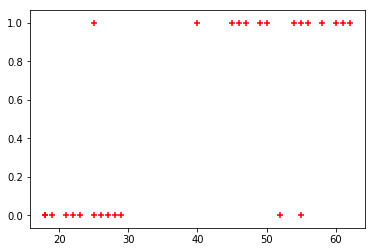

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [ ]:
X_test

,age
4,46
8,62
26,23
17,58
24,50
25,54


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
X_test

,age
16,25
21,26
2,47


In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

array([[0.40569485, 0.59430515],
       [0.26002994, 0.73997006],
       [0.63939494, 0.36060506],
       [0.29321765, 0.70678235],
       [0.36637568, 0.63362432],
       [0.32875922, 0.67124078]])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
y_predicted

array([1, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
X_test

,age
4,46
8,62
26,23
17,58
24,50
25,54


**model.coef_ indicates value of m in y=m*x + b equation**

In [ ]:
model.coef_

array([[0.04150133]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [ ]:
model.intercept_

array([-1.52726963])

**Lets defined sigmoid function now and do the math with hand**

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [ ]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [ ]:
age = 43
prediction_function(age)

0.568565299077705

**0.485 is more than 0.5 which means person with 43 will buy the insurance**

## **Segundo ejemplo**

Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2 style="color:purple">Data exploration and visualization</h2>

In [ ]:
left = df[df.left==1]
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 10)

**Average numbers for all columns** 

In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li> Satisfaction Level: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li> Average Monthly Hours: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li> Promotion Last 5 Years: Employees who are given promotion are likely to be retained at firm </li>
</ol>

**Impact of salary on employee retention**

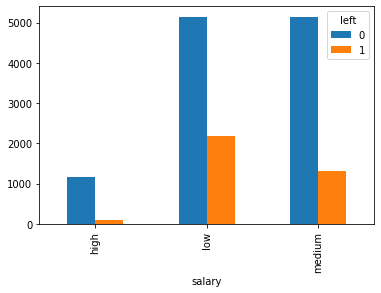

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

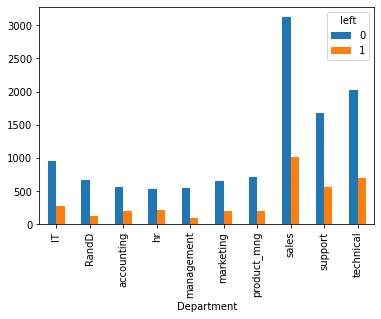

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary dummy variable**

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [ ]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [ ]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
y = df.left

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

**Accuracy of the model**

In [ ]:
model.score(X_test,y_test)

0.7790476190476191

## **Sklearn**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

https://www.kaggle.com/kanncaa1/logistic-regression-implementation

In [ ]:
data = pd.read_csv("data.csv")
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

In [ ]:
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b


def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
#%% forward and backward
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [ ]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
#%%  # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 0.692836
Cost after iteration 10: 0.498576
Cost after iteration 20: 0.404996
Cost after iteration 30: 0.350059
Cost after iteration 40: 0.313747
Cost after iteration 50: 0.287767
Cost after iteration 60: 0.268114
Cost after iteration 70: 0.252627
Cost after iteration 80: 0.240036
Cost after iteration 90: 0.229543


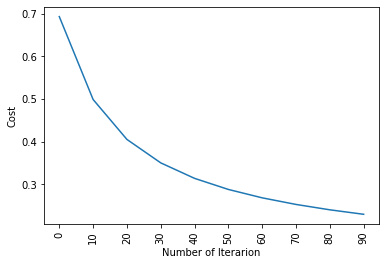

train accuracy: 94.40993788819875 %
test accuracy: 94.18604651162791 %


In [ ]:
# %%
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100) 

In [ ]:
# sklearn
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.9767441860465116 
train accuracy: 0.968944099378882 


## **Sklearn Multiclass**

In [ ]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 432x288 with 0 Axes>

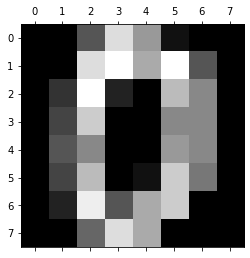

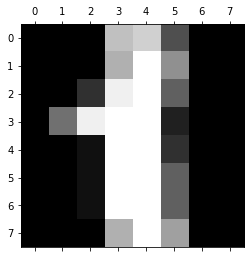

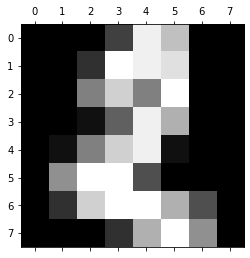

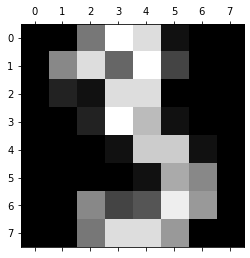

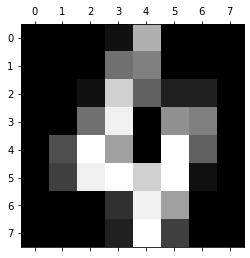

In [ ]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [ ]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Create and train logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [ ]:
model.score(X_test, y_test)

0.9694444444444444

In [ ]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  1,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

Text(69.0, 0.5, 'Truth')

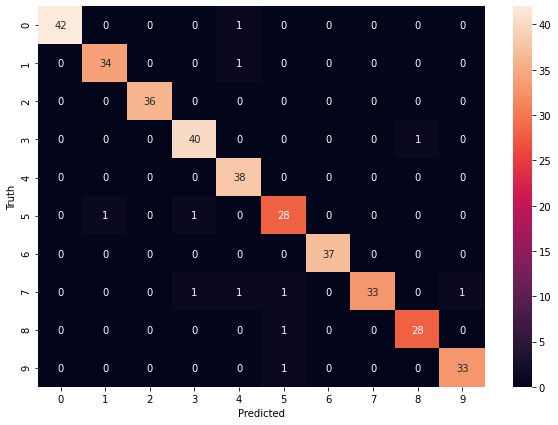

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Keras**

## **Ejemplo**

Set de datos: estudiantes que aprobaron (1) o reprobaron (0) el examen con base en el número de horas estudiadas ($x_1$) y el número de horas de sueño ($x_2$) [DOS CARACTERISTICAS]

https://github.com/codificandobits/Regresion_Logistica_en_Keras

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Keras: Librerias 
# Sequential, Dense, SGD: módulos
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [2]:
datos = pd.read_csv('dataset.csv', sep=",")
print(datos)

    Horas de estudio  Horas de sueno  Categoria
0           4.855064        9.639962          1
1           8.625440        0.058927          0
2           3.828192        0.723199          0
3           7.150955        3.899420          1
4           6.477900        8.198181          1
..               ...             ...        ...
95          0.022280        2.658428          0
96          7.630637        7.405351          1
97          3.684997        5.049965          0
98          7.484260        6.059396          1
99          2.030708        3.937267          0

[100 rows x 3 columns]


In [3]:
# Crear datos de entrenamiento (X) y categorías de salida (Y). X: las
# dos primeras columnas, Y: la tercera columna

X = datos.values[:,0:2]
Y = datos.values[:,2]

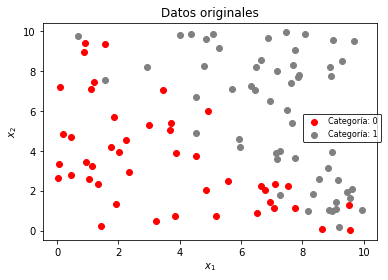

In [4]:
# Graficar
# Identificamos las posiciones donde Y==0 e Y==1
idx0 = np.where(Y==0)
idx1 = np.where(Y==1)

# Valores de la primera y segunda columna con la posicion idx0 pintados de rojo (Categoria0)
plt.scatter(X[idx0,0],X[idx0,1],color='red',label='Categoría: 0') 

# Valores de la primera y segunda columna con la posicion idx1 pintados de gris (Categoria1)
plt.scatter(X[idx1,0],X[idx1,1],color='gray',label='Categoría: 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(bbox_to_anchor=(0.765,0.6),fontsize=8,edgecolor='black')
plt.title('Datos originales')
plt.show()

**Crear el modelo en Keras**

In [5]:
#CARACTERISTICAS DE LA NEURONA principalmente tiene 3 parametros
# dimension de entrada, dimension de salida, funcion de activacion
# - input_dim: 2, pues cada dato tiene 2 características (x1 y x2)
# - output_dim: 1, pues se tiene una de dos posibles categorías (0 ó 1)
# - Activación: sigmoidal

np.random.seed(1)       # para reproducibilidad
input_dim = X.shape[1]
output_dim = 1                          

modelo = Sequential()
modelo.add(Dense(output_dim, input_dim = input_dim, activation='sigmoid'))

In [6]:
# COMO HAREMOS EL ENTRENAMIENTO
# Optimización: se usará gradiente descendente (SGD) con lr=0.2, función de error entropía
# cruzada (binary_crossentropy), métrica para el desempeño: accuracy (precisión)

sgd = SGD(lr=0.2)
modelo.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#perdida (loss) : en regresion logistica es entropia cruzada

**Entrenamiento**

In [7]:
num_epochs = 1000
batch_size = X.shape[0]
historia = modelo.fit(X, Y, epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 3.4286 - accuracy: 0.4500
Epoch 2/1000
1/1 - 0s - loss: 0.9980 - accuracy: 0.6700
Epoch 3/1000
1/1 - 0s - loss: 0.8633 - accuracy: 0.6600
Epoch 4/1000
1/1 - 0s - loss: 0.7620 - accuracy: 0.6700
Epoch 5/1000
1/1 - 0s - loss: 0.6912 - accuracy: 0.6700
Epoch 6/1000
1/1 - 0s - loss: 0.6495 - accuracy: 0.6600
Epoch 7/1000
1/1 - 0s - loss: 0.6309 - accuracy: 0.6600
Epoch 8/1000
1/1 - 0s - loss: 0.6273 - accuracy: 0.5700
Epoch 9/1000
1/1 - 0s - loss: 0.6326 - accuracy: 0.7000
Epoch 10/1000
1/1 - 0s - loss: 0.6624 - accuracy: 0.5500
Epoch 11/1000
1/1 - 0s - loss: 0.6785 - accuracy: 0.5300
Epoch 12/1000
1/1 - 0s - loss: 0.7818 - accuracy: 0.5500
Epoch 13/1000
1/1 - 0s - loss: 0.6963 - accuracy: 0.5100
Epoch 14/1000
1/1 - 0s - loss: 0.8246 - accuracy: 0.5500
Epoch 15/1000
1/1 - 0s - loss: 0.6773 - accuracy: 0.5300
Epoch 16/1000
1/1 - 0s - loss: 0.7902 - accuracy: 0.5500
Epoch 17/1000
1/1 - 0s - loss: 0.6774 - accuracy: 0.5300
Epoch 18/1000
1/1 - 0s - loss: 0.7952 - 

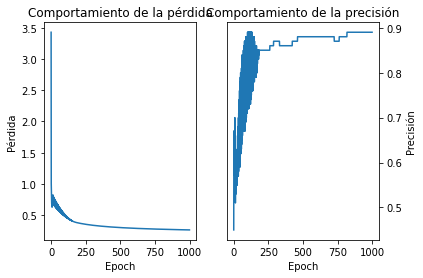

In [8]:
# Graficar comportamiento de la pérdida y de la precisión
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.title('Comportamiento de la pérdida')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.title('Comportamiento de la precisión')

ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.show()

**Graficar frontera de decisión**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


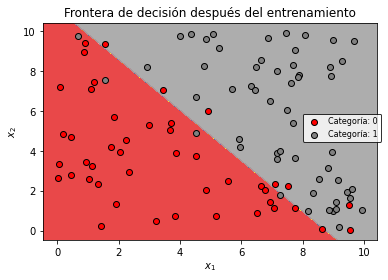

In [9]:
def dibujar_frontera(X,Y,modelo,titulo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la gruilla
    Z = modelo.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    idx0 = np.where(Y==0)
    idx1 = np.where(Y==1)
    plt.scatter(X[idx0,0],X[idx0,1],color='red', edgecolor='k', label='Categoría: 0')
    plt.scatter(X[idx1,0],X[idx1,1],color='gray',edgecolor='k', label='Categoría: 1')
    plt.legend(bbox_to_anchor=(0.765,0.6),fontsize=8,edgecolor='black')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titulo)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

dibujar_frontera(X,Y,modelo,'Frontera de decisión después del entrenamiento')

## **Keras multiclase**

https://github.com/codificandobits/Clasificacion_del_Set_Iris_en_Keras

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

In [ ]:
# Funciones auxiliares: dibujar frontera de decisión

def dibujar_frontera(X,Y,modelo,titulo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la gruilla
    Z = modelo.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    Y = np.argmax(Y,axis=1)
    idx0 = np.where(Y==0)
    idx1 = np.where(Y==1)
    idx2 = np.where(Y==2)
    plt.scatter(X[idx0,0],X[idx0,1],c=(1,0,0), edgecolor='k', label='Iris setosa')
    plt.scatter(X[idx1,0],X[idx1,1],c=(124./255.,44./255.,169./255.),edgecolor='k', label='Iris-versicolor')
    plt.scatter(X[idx2,0],X[idx2,1],c=(128./255.,128./255.,128./255.),edgecolor='k', label='Iris-virginica')
    plt.legend(fontsize=8,loc='upper right')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titulo)

    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    plt.show()

In [ ]:
# Lectura de los datos y visualización. Se usarán únicamente "SepalLengthCm"
# y "SepalWidthCm" para la clasificación.
datos = pd.read_csv('Iris.csv',usecols=[1,2,5])
datos

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


In [ ]:
# Crear datos de entrada (X) y de salida (Y)
X = datos.iloc[:,0:2].values
Y_str = datos.iloc[:,2].values

In [ ]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [ ]:
Y_str

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
# Convertir "labels" de caracteres a números
encoder = LabelEncoder()
encoder.fit(Y_str)
Y_num = encoder.transform(Y_str)


In [ ]:
# Convertir "Y_num" a representación "one-hot", requerida por Keras durante
# el entrenamiento
n_clases = 3
Y = np_utils.to_categorical(Y_num,n_clases)

In [ ]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


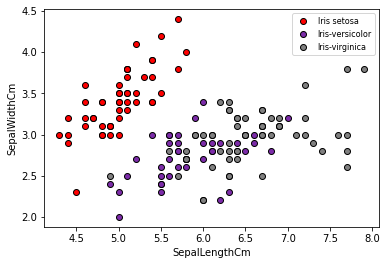

In [ ]:
# Graficar los datos
idx0 = np.where(Y_num==0)
idx1 = np.where(Y_num==1)
idx2 = np.where(Y_num==2)
plt.scatter(X[idx0,0],X[idx0,1],c=(1,0,0), edgecolor='k', label='Iris setosa')
plt.scatter(X[idx1,0],X[idx1,1],c=(124./255.,44./255.,169./255.),edgecolor='k', label='Iris-versicolor')
plt.scatter(X[idx2,0],X[idx2,1],c=(128./255.,128./255.,128./255.),edgecolor='k', label='Iris-virginica')
plt.legend(fontsize=8,loc='upper right')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [ ]:
# Crear el modelo:
# - Entrada: 2 dimensiones (SepalLengthCm y SepalWidthCm)
# - Salida: 3 dimensiones (3 clases)
# - Activación: softmax

np.random.seed(1)           # Para reproducibilidad del entrenamiento
input_dim = X.shape[1]
output_dim = Y.shape[1]

modelo = Sequential()
modelo.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [ ]:
# Optimizador, tasa de aprendizaje, función de pérdida y métrica de desempeño
sgd = SGD(lr=0.1)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# Entrenamiento. Se usarán 2000 iteraciones y un batch_size igual al número total de datos

n_its = 2000
batch_size = X.shape[0]
historia = modelo.fit(X,Y,epochs=n_its,batch_size=batch_size,verbose=2)

Epoch 1/2000
1/1 - 0s - loss: 3.7597 - accuracy: 0.3333
Epoch 2/2000
1/1 - 0s - loss: 1.5115 - accuracy: 0.6267
Epoch 3/2000
1/1 - 0s - loss: 0.9402 - accuracy: 0.5933
Epoch 4/2000
1/1 - 0s - loss: 0.8998 - accuracy: 0.5133
Epoch 5/2000
1/1 - 0s - loss: 0.8907 - accuracy: 0.6267
Epoch 6/2000
1/1 - 0s - loss: 0.8845 - accuracy: 0.6200
Epoch 7/2000
1/1 - 0s - loss: 0.8796 - accuracy: 0.6400
Epoch 8/2000
1/1 - 0s - loss: 0.8752 - accuracy: 0.6400
Epoch 9/2000
1/1 - 0s - loss: 0.8709 - accuracy: 0.6467
Epoch 10/2000
1/1 - 0s - loss: 0.8667 - accuracy: 0.6333
Epoch 11/2000
1/1 - 0s - loss: 0.8627 - accuracy: 0.6400
Epoch 12/2000
1/1 - 0s - loss: 0.8587 - accuracy: 0.6333
Epoch 13/2000
1/1 - 0s - loss: 0.8548 - accuracy: 0.6333
Epoch 14/2000
1/1 - 0s - loss: 0.8509 - accuracy: 0.6333
Epoch 15/2000
1/1 - 0s - loss: 0.8472 - accuracy: 0.6333
Epoch 16/2000
1/1 - 0s - loss: 0.8435 - accuracy: 0.6400
Epoch 17/2000
1/1 - 0s - loss: 0.8399 - accuracy: 0.6400
Epoch 18/2000
1/1 - 0s - loss: 0.8364 - 

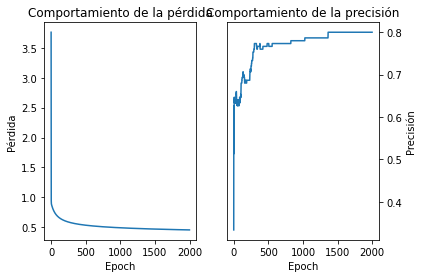

In [ ]:
# Resultados

# Graficar comportamiento de la pérdida y de la precisión
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.title('Comportamiento de la pérdida')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.title('Comportamiento de la precisión')

ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case

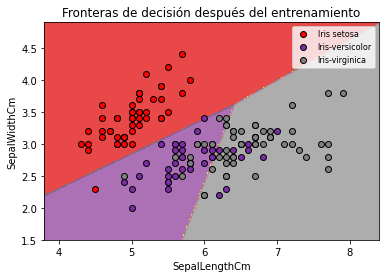

In [ ]:
# Dibujar frontera de decisión
dibujar_frontera(X,Y,modelo,'Fronteras de decisión después del entrenamiento')

# **Ejemplo**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:,3:13].values
Y = dataset.iloc[:,13].values

In [ ]:
dataset.head()

In [ ]:
X

In [ ]:
Y

In [ ]:
# Codificando datos categoricos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])

labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])

Esto hace que la columna de "Geography" y "Gender" pasen a ser numero y ya no strings

In [ ]:
X

In [ ]:
onehot = OneHotEncoder(categories='auto')
X_temp = onehot.fit_transform(X[:, 1].reshape(-1,1)).toarray()

X = np.concatenate((X_temp, X), axis=1)
X = np.delete(X, 4, 1)

In [ ]:
X

In [ ]:
# Division de los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
# Ajusye de escala
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

**CREACIÓN DE LA RED NEURONAL**

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
red = Sequential()

In [ ]:
# Creamos la red de entrada
red.add(Dense(output_dim = 6,
    input_dim = 11,
    init = 'uniform',
    activation = 'relu'
  ))

In [ ]:
# 1° capa oculta
red.add(Dense(
    output_dim = 6,
    init = 'uniform',
    activation = 'relu'
  ))

In [ ]:
# 2° capa oculta
red.add(Dense(
    output_dim = 6,
    init = 'uniform',
    activation = 'relu',
  ))

In [ ]:
# Capa de salida
red.add(Dense(
    output_dim = 1,
    init = 'uniform',
    activation = 'sigmoid',
  ))

In [ ]:
red.compile(optimizar = 'adam',loss='binary_crossentropy',metrics='accuracy')